In [22]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import matplotlib.pyplot as plt


1.8.0


In [19]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total para

1 1 8


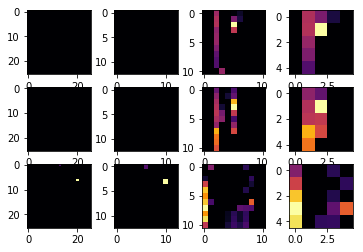

In [39]:
# visualize each layer result
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=34
CONVOLUTION_NUMBER = 1 # which epoch we check
print(test_labels[FIRST_IMAGE], test_labels[SECOND_IMAGE], test_labels[THIRD_IMAGE]) #real class

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs) #identify which layer result to show

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [17]:
# YOUR CODE STARTS HERE
class MyClass(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.998):
            print( "Reached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = MyClass()


model = tf.keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
60000/60000 [==============================] - 30s 506us/step - loss: 0.1522 - acc: 0.9545
Epoch 2/20
60000/60000 [==============================] - 27s 457us/step - loss: 0.0517 - acc: 0.9845
Epoch 3/20
60000/60000 [==============================] - 32s 531us/step - loss: 0.0326 - acc: 0.9902
Epoch 4/20
60000/60000 [==============================] - 26s 441us/step - loss: 0.0229 - acc: 0.9929
Epoch 5/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.0148 - acc: 0.9952
Epoch 6/20
60000/60000 [==============================] - 26s 428us/step - loss: 0.0105 - acc: 0.9966
Epoch 7/20
60000/60000 [==============================] - 25s 416us/step - loss: 0.0082 - acc: 0.9973
Epoch 8/20
60000/60000 [==============================] - 25s 416us/step - loss: 0.0066 - acc: 0.9978
Epoch 9/20
60000/60000 [==============================] - 26s 426us/step - loss: 0.0051 - acc: 0.9981
Reached 99.8% accuracy so cancelling training!
